### Kelompok 13

#### Import Library

In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import csv
import nltk
import csv
import nltk
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#### Data Understanding

In [2]:
df = pd.read_csv("SINGGALANG.tsv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
print(df)

                0  1
0              Ia  O
1        menjabat  O
2         sebagai  O
3        Presiden  O
4          ketiga  O
...           ... ..
1051907  terutama  O
1051908      pada  O
1051909   tanggal  O
1051910        20  O
1051911   Oktober  O

[1051912 rows x 2 columns]


In [3]:
list_kalimat = []
nomor_kalimat = 1

with open('SINGGALANG.tsv', encoding='UTF-8') as read_obj:
    csv_reader = csv.reader(read_obj, delimiter='\t', quotechar=None)
    for row in csv_reader:
        if len(row) == 0:
            nomor_kalimat += 1 
        else:
            tmp_row= row
            tmp_row.append(nomor_kalimat)
            list_kalimat.append(tmp_row)

dataset = pd.DataFrame(list_kalimat, columns=['Word', 'Tag', 'kalimat'])

In [4]:
dataset.head(5)

Word Tag  kalimat
0        Ia   O        1
1  menjabat   O        1
2   sebagai   O        1
3  Presiden   O        1
4    ketiga   O        1

In [5]:
dataset["Word"]

0                Ia
1          menjabat
2           sebagai
3          Presiden
4            ketiga
             ...   
1051907    terutama
1051908        pada
1051909     tanggal
1051910          20
1051911     Oktober
Name: Word, Length: 1051912, dtype: object

In [6]:
dataset.head(10)

Word    Tag  kalimat
0        Ia      O        1
1  menjabat      O        1
2   sebagai      O        1
3  Presiden      O        1
4    ketiga      O        1
5     Mesir  Place        1
6      pada      O        1
7   periode      O        1
8        15      O        1
9   Oktober      O        1

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051912 entries, 0 to 1051911
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Word     1051912 non-null  object
 1   Tag      1051912 non-null  object
 2   kalimat  1051912 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.1+ MB


#### Data Prepraration

In [8]:
class getSentence(object): 
    
    def __init__(self, data):
      self.n_sent = 1.0
      self.dataset = dataset
      self.empty = False 
       
      agg_func = lambda s: [(t, e) for t, e in zip(s["Word"].values.tolist(),
                                                 s["Tag"].values.tolist())]                                           
      self.grouped = self.dataset.groupby("kalimat").apply(agg_func)
      self.sentences = [s for s in self.grouped]

In [9]:
getter = getSentence(dataset)
kalimat = getter.sentences
print(kalimat[1])

[('Robert', 'O'), ('Peter', 'O'), ('Maximillian', 'O'), ('Williams', 'Person'), ('-LRB-', 'O'), ('-RRB-', 'O'), ('merupakan', 'O'), ('penyanyi', 'O'), ('berkebangsaan', 'O'), ('Inggris.Dia', 'O'), ('adalah', 'O'), ('anggota', 'O'), ('kelompok', 'O'), ('pop', 'O'), ('Take', 'O'), ('That', 'O'), ('.', 'O')]


In [10]:
print(kalimat[2])

[('Pada', 'O'), ('tanggal', 'O'), ('15', 'O'), ('Juli', 'O'), ('2010', 'O'), (',', 'O'), ('ia', 'O'), ('mengumumkan', 'O'), ('ia', 'O'), ('telah', 'O'), ('bergabung', 'O'), ('kembali', 'O'), ('Take', 'O'), ('That', 'O'), ('dan', 'O'), ('kelompok', 'O'), ('dimaksudkan', 'O'), ('untuk', 'O'), ('merilis', 'O'), ('album', 'O'), ('baru', 'O'), ('pada', 'O'), ('bulan', 'O'), ('November', 'O'), ('2010', 'O'), ('.', 'O')]


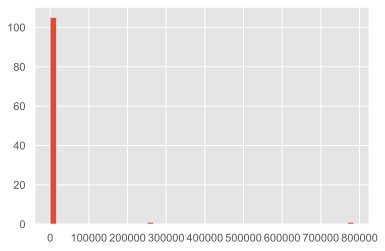

In [11]:
# #Lets visualize how the sentences are distributed by their length
plt.style.use("ggplot")
plt.hist([len(s) for s in kalimat], bins=50)
plt.show()

In [12]:
maxlen = max([len(s) for s in kalimat])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 785361


In [13]:
dataset.loc[dataset['Tag'] == 'Person', 'Word'].head()

40     Sadat
105    Anwar
106    Sadat
110    Hafez
112    Assad
Name: Word, dtype: object

In [14]:
dataset.loc[dataset['Tag'] == 'Organisation', 'Word'].head()

587    Universitas
588      Indonesia
734     Independen
804    Universitas
805         Gadjah
Name: Word, dtype: object

In [15]:
dataset.loc[dataset['Tag'] == 'Place', 'Word'].head()

5        Mesir
30       Mesir
49       Mesir
71    Kerajaan
73       Kairo
Name: Word, dtype: object

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


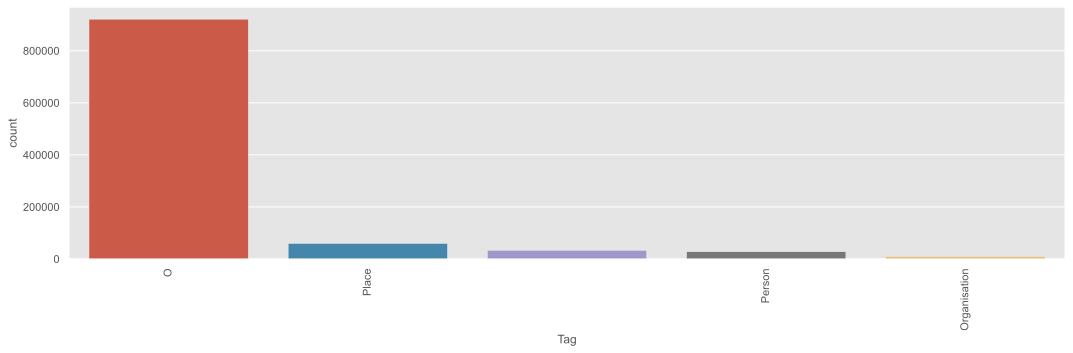

In [16]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


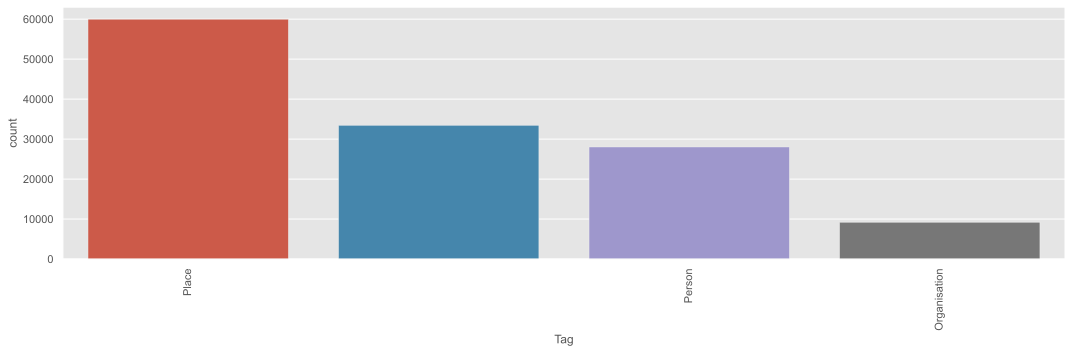

In [17]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=dataset.loc[dataset['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

#### Data Cleaning

In [18]:
dataset_prep = pd.DataFrame(list_kalimat, columns=['Word', 'Tag', 'kalimat'])

In [19]:
import re
def perbaikan_format_tanda_baca(dataset_prep):    
    for i in dataset_prep.index:
        token = re.sub('([.,!?()])', r'\1 ', dataset_prep.at[i, 'Word'])
        dataset_prep.at[i, 'Word'] = re.sub('\s{2,}', ' ', token)
    return dataset_prep
perbaikan_format_tanda_baca(dataset_prep)

Word Tag  kalimat
0              Ia   O        1
1        menjabat   O        1
2         sebagai   O        1
3        Presiden   O        1
4          ketiga   O        1
...           ...  ..      ...
1051907  terutama   O      107
1051908      pada   O      107
1051909   tanggal   O      107
1051910        20   O      107
1051911   Oktober   O      107

[1051912 rows x 3 columns]

##### Case Folding (Lowercase)

In [20]:
dataset_prep["Word"] = dataset_prep["Word"].str.lower()
dataset_prep.head()

Word Tag  kalimat
0        ia   O        1
1  menjabat   O        1
2   sebagai   O        1
3  presiden   O        1
4    ketiga   O        1

#### IOB Annotation

In [21]:
bio_tag = []
prev_tag = "O"
for tag in dataset_prep['Tag']:
        if tag == "O": #O
            bio_tag.append((tag))
            prev_tag = tag
            continue
        if tag != "O" and prev_tag == "O": # Begin NE
            bio_tag.append(("B-"+tag))
            prev_tag = tag
        elif prev_tag != "O" and prev_tag == tag: # Inside NE
            bio_tag.append(("I-"+tag))
            prev_tag = tag
        elif prev_tag != "O" and prev_tag != tag: # NE yang berdekatan
            bio_tag.append(( "B-"+tag))
            prev_tag = tag

In [22]:
dataset_prep['bio_tag'] = bio_tag
dataset_prep.iloc[:2000]

Word    Tag  kalimat  bio_tag
0            ia      O        1        O
1      menjabat      O        1        O
2       sebagai      O        1        O
3      presiden      O        1        O
4        ketiga      O        1        O
...         ...    ...      ...      ...
1995   kerajaan  Place        1  B-Place
1996  majapahit  Place        1  I-Place
1997         di      O        1        O
1998      bawah      O        1        O
1999       raja      O        1        O

[2000 rows x 4 columns]

In [23]:
master_count = dataset_prep["Tag"].value_counts() 
master_count

O               921226
Place            59994
                 33453
Person           28028
Organisation      9211
Name: Tag, dtype: int64

In [24]:
dataset_prep.iloc[:2000]

Word    Tag  kalimat  bio_tag
0            ia      O        1        O
1      menjabat      O        1        O
2       sebagai      O        1        O
3      presiden      O        1        O
4        ketiga      O        1        O
...         ...    ...      ...      ...
1995   kerajaan  Place        1  B-Place
1996  majapahit  Place        1  I-Place
1997         di      O        1        O
1998      bawah      O        1        O
1999       raja      O        1        O

[2000 rows x 4 columns]

#### Modeling Data using Random Forest

In [25]:
def feature_map(word):
    return np.array([word.istitle(), word.islower(), word.isupper(), len(word),
                     word.isdigit(),  word.isalpha()])

In [26]:
words = [feature_map(w) for w in dataset["Word"].values.tolist()]
tags = dataset["Tag"].values.tolist()

In [27]:
print(words[:5])

[array([1, 0, 0, 2, 0, 1]), array([0, 1, 0, 8, 0, 1]), array([0, 1, 0, 7, 0, 1]), array([1, 0, 0, 8, 0, 1]), array([0, 1, 0, 6, 0, 1])]


In [28]:
pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X=words, y=tags, cv=5)

#### Evaluate and Result

In [29]:
report = classification_report(y_pred=pred, y_true=tags)
print(report)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

                   1.00      1.00      1.00     33453
           O       0.92      0.99      0.95    921226
Organisation       0.00      0.00      0.00      9211
      Person       0.00      0.00      0.00     28028
       Place       0.47      0.19      0.27     59994

    accuracy                           0.91   1051912
   macro avg       0.48      0.44      0.44   1051912
weighted avg       0.86      0.91      0.88   1051912



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
